In [1]:
%cd ../

/home/zulqarnain/algorithm16_skipped/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import matplotlib.pyplot as plt

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [3]:
import itertools
from torch.nn.functional import softplus
import matplotlib.patches as mpatches
from ordered_set import OrderedSet

In [4]:
import torch

# torch.cuda.set_device(0)

In [5]:
%matplotlib inline

In [6]:
TRAIN = True

In [7]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [8]:
scenario = '2'
noise_factor = 10
num_subjects = 2
db_file = 'data/simulated_simplified_data_' + scenario + '_' + str(num_subjects)+ '_' + str(noise_factor) + '.db'
scenario_name = 'scenario_' + scenario + '_' + str(num_subjects)+ '_' + str(noise_factor)
TRAIN = True
synthetic_db = niidb.FMriActivationsDb(db_file)

In [11]:
dtfa = DTFA.DeepTFA(synthetic_db.all(), mask='/home/zulqarnain/fmri_data/simulated_degeneracy_data/wholebrain.nii.gz', num_factors=9, embedding_dim=2)

10/08/2021 15:21:53 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/scenario_2_subjects_2_10/nifti_files/participant_1_video1_low_0.nii with mask /home/zulqarnain/fmri_data/simulated_simplified_data_C/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
10/08/2021 15:21:53 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/scenario_2_subjects_2_10/nifti_files/participant_1_video2_low_0.nii with mask /home/zulqarnain/fmri_data/simulated_simplified_data_C/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
10/08/2021 15:21:53 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/scenario_2_subjects_2_10/nifti_files/participant_1_video3_high_0.nii with mask /home/zulqarnain/fmri_data/simulated_simplified_data_C/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
10/08/2021 15:21:53 Loading Nifti image /home/zulqarnain/fmri_data/simulated_simplified_data_C/scenario_2_subje

In [12]:
dtfa.num_blocks

16

In [13]:
dtfa.tasks()

OrderedSet(['video1', 'video2', 'video3', 'video4', 'video5', 'video6', 'video7', 'video8'])

In [14]:
dtfa.subjects()

OrderedSet([1, 2])

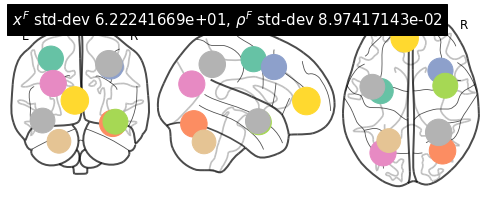

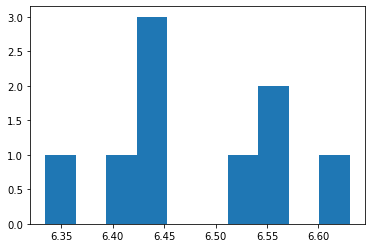

(<nilearn.plotting.displays.OrthoProjector at 0x7fabbd6c7090>,
 tensor([[-30.8426,  -6.7773,  49.3710],
         [ 34.2334, -69.5687, -18.6831],
         [ 32.0452,  14.7081,  41.1164],
         [-28.4019, -71.7297,  23.2548],
         [ 37.1090,  -1.1494, -16.9952],
         [ -5.6274,  48.7750,   5.3800],
         [-22.3424, -58.8649, -37.6156],
         [ 30.1922, -50.2279,  44.0099],
         [-39.6266,  -2.2334, -15.7980]]),
 tensor([6.4468, 6.5551, 6.4510, 6.5274, 6.4316, 6.6306, 6.3344, 6.5524, 6.4230]))

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
if TRAIN:
    losses = dtfa.train(num_steps=400, learning_rate={'q': 1e-1, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                        batch_size=60, use_cuda=True, checkpoint_steps=500, blocks_batch_size=60, patience=50)
else:
    dtfa.load_state('scenario_2_final_08202020_104957')

10/08/2021 15:22:00 [Epoch 1] (719ms) Posterior free-energy 9.08944160e+07 = KL from prior 7.98662646e+03 - log-likelihood -9.08864320e+07
10/08/2021 15:22:00 Saving checkpoint...
10/08/2021 15:22:00 [Epoch 2] (342ms) Posterior free-energy 8.87347520e+07 = KL from prior 8.06833154e+03 - log-likelihood -8.87266800e+07
10/08/2021 15:22:00 [Epoch 3] (332ms) Posterior free-energy 8.70698480e+07 = KL from prior 8.05630518e+03 - log-likelihood -8.70617920e+07
10/08/2021 15:22:01 [Epoch 4] (328ms) Posterior free-energy 8.56880400e+07 = KL from prior 8.20325195e+03 - log-likelihood -8.56798400e+07
10/08/2021 15:22:01 [Epoch 5] (320ms) Posterior free-energy 8.48852720e+07 = KL from prior 8.23141309e+03 - log-likelihood -8.48770400e+07
10/08/2021 15:22:01 [Epoch 6] (317ms) Posterior free-energy 8.42256000e+07 = KL from prior 8.34628516e+03 - log-likelihood -8.42172560e+07
10/08/2021 15:22:02 [Epoch 7] (316ms) Posterior free-energy 8.36632800e+07 = KL from prior 8.41861816e+03 - log-likelihood -8

10/08/2021 15:22:25 [Epoch 60] (422ms) Posterior free-energy 8.15218320e+07 = KL from prior 1.05946318e+04 - log-likelihood -8.15112400e+07
10/08/2021 15:22:26 [Epoch 61] (428ms) Posterior free-energy 8.14926640e+07 = KL from prior 1.06602188e+04 - log-likelihood -8.14820000e+07
10/08/2021 15:22:26 [Epoch 62] (475ms) Posterior free-energy 8.15080480e+07 = KL from prior 1.06236025e+04 - log-likelihood -8.14974240e+07
10/08/2021 15:22:27 [Epoch 63] (480ms) Posterior free-energy 8.15082080e+07 = KL from prior 1.05711426e+04 - log-likelihood -8.14976400e+07
10/08/2021 15:22:27 [Epoch 64] (447ms) Posterior free-energy 8.15124080e+07 = KL from prior 1.06334248e+04 - log-likelihood -8.15017760e+07
10/08/2021 15:22:28 [Epoch 65] (437ms) Posterior free-energy 8.14954240e+07 = KL from prior 1.06394834e+04 - log-likelihood -8.14847840e+07
10/08/2021 15:22:28 [Epoch 66] (450ms) Posterior free-energy 8.14926720e+07 = KL from prior 1.05528936e+04 - log-likelihood -8.14821200e+07
10/08/2021 15:22:28 

10/08/2021 15:22:53 [Epoch 119] (457ms) Posterior free-energy 8.09898560e+07 = KL from prior 8.77261035e+03 - log-likelihood -8.09810800e+07
10/08/2021 15:22:54 [Epoch 120] (468ms) Posterior free-energy 8.09871840e+07 = KL from prior 8.80791992e+03 - log-likelihood -8.09783760e+07
10/08/2021 15:22:54 [Epoch 121] (576ms) Posterior free-energy 8.09773280e+07 = KL from prior 8.64103320e+03 - log-likelihood -8.09686880e+07
10/08/2021 15:22:55 [Epoch 122] (481ms) Posterior free-energy 8.09736480e+07 = KL from prior 8.66123047e+03 - log-likelihood -8.09649840e+07
10/08/2021 15:22:55 [Epoch 123] (440ms) Posterior free-energy 8.09571840e+07 = KL from prior 8.60285938e+03 - log-likelihood -8.09485840e+07
10/08/2021 15:22:56 [Epoch 124] (437ms) Posterior free-energy 8.09539840e+07 = KL from prior 8.63475781e+03 - log-likelihood -8.09453520e+07
10/08/2021 15:22:56 [Epoch 125] (493ms) Posterior free-energy 8.09550400e+07 = KL from prior 8.58963184e+03 - log-likelihood -8.09464480e+07
10/08/2021 15

10/08/2021 15:23:23 [Epoch 178] (471ms) Posterior free-energy 8.07844720e+07 = KL from prior 6.41871484e+03 - log-likelihood -8.07780560e+07
10/08/2021 15:23:23 [Epoch 179] (422ms) Posterior free-energy 8.07790240e+07 = KL from prior 6.48702393e+03 - log-likelihood -8.07725360e+07
10/08/2021 15:23:24 [Epoch 180] (433ms) Posterior free-energy 8.07807360e+07 = KL from prior 6.39978174e+03 - log-likelihood -8.07743360e+07
10/08/2021 15:23:24 [Epoch 181] (483ms) Posterior free-energy 8.07842160e+07 = KL from prior 6.39935889e+03 - log-likelihood -8.07778160e+07
10/08/2021 15:23:25 [Epoch 182] (491ms) Posterior free-energy 8.07805040e+07 = KL from prior 6.32762549e+03 - log-likelihood -8.07741760e+07
10/08/2021 15:23:25 [Epoch 183] (488ms) Posterior free-energy 8.07772960e+07 = KL from prior 6.28018311e+03 - log-likelihood -8.07710160e+07
10/08/2021 15:23:26 [Epoch 184] (487ms) Posterior free-energy 8.07770560e+07 = KL from prior 6.23997119e+03 - log-likelihood -8.07708160e+07
10/08/2021 15

10/08/2021 15:23:52 [Epoch 237] (489ms) Posterior free-energy 8.07425840e+07 = KL from prior 5.64600537e+03 - log-likelihood -8.07369360e+07
10/08/2021 15:23:53 [Epoch 238] (513ms) Posterior free-energy 8.07433120e+07 = KL from prior 5.55952100e+03 - log-likelihood -8.07377520e+07
10/08/2021 15:23:53 [Epoch 239] (532ms) Posterior free-energy 8.07425040e+07 = KL from prior 5.60220703e+03 - log-likelihood -8.07369040e+07
10/08/2021 15:23:54 [Epoch 240] (521ms) Posterior free-energy 8.07432240e+07 = KL from prior 5.54262842e+03 - log-likelihood -8.07376800e+07
10/08/2021 15:23:54 [Epoch 241] (464ms) Posterior free-energy 8.07424960e+07 = KL from prior 5.60516113e+03 - log-likelihood -8.07368880e+07
10/08/2021 15:23:55 [Epoch 242] (455ms) Posterior free-energy 8.07420080e+07 = KL from prior 5.65326025e+03 - log-likelihood -8.07363520e+07
10/08/2021 15:23:55 [Epoch 243] (474ms) Posterior free-energy 8.07417280e+07 = KL from prior 5.66292285e+03 - log-likelihood -8.07360640e+07
10/08/2021 15

10/08/2021 15:24:21 [Epoch 296] (528ms) Posterior free-energy 8.07334160e+07 = KL from prior 5.65433398e+03 - log-likelihood -8.07277600e+07
10/08/2021 15:24:22 [Epoch 297] (511ms) Posterior free-energy 8.07336400e+07 = KL from prior 5.68930322e+03 - log-likelihood -8.07279520e+07
10/08/2021 15:24:23 [Epoch 298] (718ms) Posterior free-energy 8.07336080e+07 = KL from prior 5.65242236e+03 - log-likelihood -8.07279520e+07
10/08/2021 15:24:23 [Epoch 299] (637ms) Posterior free-energy 8.07330960e+07 = KL from prior 5.66991602e+03 - log-likelihood -8.07274240e+07
10/08/2021 15:24:24 [Epoch 300] (551ms) Posterior free-energy 8.07330800e+07 = KL from prior 5.70945264e+03 - log-likelihood -8.07273680e+07
10/08/2021 15:24:24 [Epoch 301] (492ms) Posterior free-energy 8.07326960e+07 = KL from prior 5.63095947e+03 - log-likelihood -8.07270640e+07
10/08/2021 15:24:25 [Epoch 302] (510ms) Posterior free-energy 8.07334720e+07 = KL from prior 5.62735547e+03 - log-likelihood -8.07278480e+07
10/08/2021 15

Epoch   331: reducing learning rate of group 0 to 5.0000e-02.
Epoch   331: reducing learning rate of group 1 to 5.0000e-04.
Epoch   331: reducing learning rate of group 2 to 5.0000e-02.
Epoch   331: reducing learning rate of group 3 to 5.0000e-04.


10/08/2021 15:24:40 [Epoch 332] (428ms) Posterior free-energy 8.07306720e+07 = KL from prior 5.70391748e+03 - log-likelihood -8.07249680e+07
10/08/2021 15:24:41 [Epoch 333] (397ms) Posterior free-energy 8.07297280e+07 = KL from prior 5.68216260e+03 - log-likelihood -8.07240480e+07
10/08/2021 15:24:41 [Epoch 334] (453ms) Posterior free-energy 8.07290240e+07 = KL from prior 5.68060938e+03 - log-likelihood -8.07233440e+07
10/08/2021 15:24:41 [Epoch 335] (493ms) Posterior free-energy 8.07299840e+07 = KL from prior 5.67563672e+03 - log-likelihood -8.07243120e+07
10/08/2021 15:24:42 [Epoch 336] (516ms) Posterior free-energy 8.07298640e+07 = KL from prior 5.65421631e+03 - log-likelihood -8.07242080e+07
10/08/2021 15:24:42 [Epoch 337] (502ms) Posterior free-energy 8.07305840e+07 = KL from prior 5.65339404e+03 - log-likelihood -8.07249280e+07
10/08/2021 15:24:43 [Epoch 338] (487ms) Posterior free-energy 8.07292800e+07 = KL from prior 5.73933350e+03 - log-likelihood -8.07235440e+07
10/08/2021 15

Epoch   382: reducing learning rate of group 0 to 2.5000e-02.
Epoch   382: reducing learning rate of group 1 to 2.5000e-04.
Epoch   382: reducing learning rate of group 2 to 2.5000e-02.
Epoch   382: reducing learning rate of group 3 to 2.5000e-04.


10/08/2021 15:25:03 [Epoch 383] (369ms) Posterior free-energy 8.07287680e+07 = KL from prior 5.59898340e+03 - log-likelihood -8.07231680e+07
10/08/2021 15:25:03 [Epoch 384] (480ms) Posterior free-energy 8.07279120e+07 = KL from prior 5.60659277e+03 - log-likelihood -8.07223040e+07
10/08/2021 15:25:04 [Epoch 385] (485ms) Posterior free-energy 8.07275520e+07 = KL from prior 5.65586328e+03 - log-likelihood -8.07218960e+07
10/08/2021 15:25:04 [Epoch 386] (491ms) Posterior free-energy 8.07280640e+07 = KL from prior 5.63506641e+03 - log-likelihood -8.07224320e+07
10/08/2021 15:25:05 [Epoch 387] (486ms) Posterior free-energy 8.07280560e+07 = KL from prior 5.67529443e+03 - log-likelihood -8.07223840e+07
10/08/2021 15:25:05 [Epoch 388] (411ms) Posterior free-energy 8.07277120e+07 = KL from prior 5.62009277e+03 - log-likelihood -8.07220880e+07
10/08/2021 15:25:06 [Epoch 389] (414ms) Posterior free-energy 8.07275520e+07 = KL from prior 5.60573291e+03 - log-likelihood -8.07219440e+07
10/08/2021 15

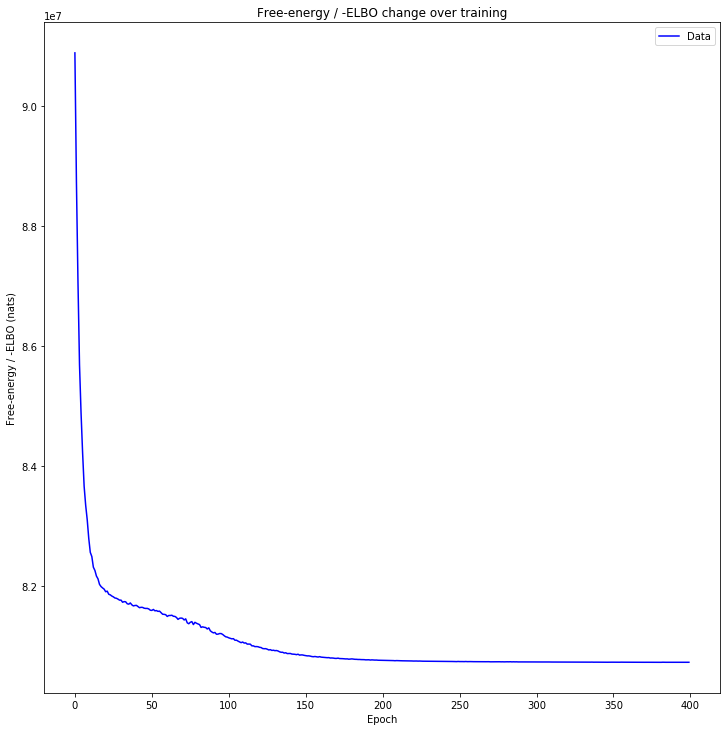

In [17]:
if TRAIN:
    utils.plot_losses(losses)

In [18]:
def task_labeler(task):
    return task


def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [19]:
def subject_labeler(subject):
    return str(subject)

In [20]:
def stimulus_labeler(stimulus):
    stim = stimulus[-1]
    if int(stim) == 1 or int(stim) == 2:
        return 'State 0'
    elif int(stim) == 3 or int(stim) == 4:
        return 'State 1'
    elif int(stim) == 5 or int(stim) == 6:
        return 'State 2'
    elif int(stim) == 7 or int(stim) == 8:
        return 'State 3'
    else:
        print ('Error')

In [21]:
def scatter_subject_embedding(self, labeler=None, filename='', show=True,
                                   xlims=None, ylims=None, figsize=utils.FIGSIZE,
                                   colormap='Accent', serialize_data=True,
                                   plot_ellipse=True, legend_ordering=None,nstd=3):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]
    
    if filename == '':
        filename = self.common_name() + '_task_embedding.pdf'
    hyperparams = self.variational.hyperparams.state_vardict()
    tasks = self.tasks()
    subjects = self.subjects()
    z_p_mu = hyperparams['subject_weight']['mu'].data
    z_s_mu = hyperparams['task']['mu'].data
    interactions = OrderedSet(list(itertools.product(subjects, tasks)))
    z_ps_mu = np.zeros(shape=(len(interactions),2))
    count = 0
    for p in range (len(subjects)):
        for t in range(len(tasks)):
            z_ps_mu[count,:] = self.decoder.interaction_embedding(
                torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)).data.numpy()
            count += 1
    embedding_name = 'z^{PS}'
    minus_lims = np.min(z_ps_mu - z_ps_sigma * 3, axis=0).tolist()
    plus_lims = np.max(z_ps_mu + z_ps_sigma * 3, axis=0).tolist()
    if not xlims:
        xlims = (minus_lims[0], plus_lims[0])
    if not ylims:
        ylims = (minus_lims[1], plus_lims[1])

    fig, ax = plt.subplots(facecolor='white', figsize=figsize, frameon=True)
    ax.set_xlabel('$%s_1$' % embedding_name)
    if xlims is not None:
        ax.set_xlim(xlims)
    ax.set_ylabel('$%s_2$' % embedding_name)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.set_title('Scenario 1')
    task_colors = ['black','darkgreen','red','blue']
    task_low_embeddings = []
    task_high_embeddings = []

    for i in range(len(z_ps_mu)):
        if stimulus_labeler(interactions[i][1]) == 'State 0':
            edgecolor = task_colors[0]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[0],facecolors='none',marker='o')
            task_low_embeddings.append(z_ps_mu[i,:])
        elif stimulus_labeler(interactions[i][1]) == 'State 1':
            edgecolor = task_colors[1]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[1],marker='o')
            task_high_embeddings.append(z_ps_mu[i,:]) 
        elif stimulus_labeler(interactions[i][1]) == 'State 2':
            edgecolor = task_colors[2]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[2],marker='o')
            task_high_embeddings.append(z_ps_mu[i,:]) 
        elif stimulus_labeler(interactions[i][1]) == 'State 3':
            edgecolor = task_colors[3]
            ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],c=task_colors[3],marker='o')
            task_high_embeddings.append(z_ps_mu[i,:]) 
        ax.annotate(str(interactions[i][0]),(z_ps_mu[i,0],z_ps_mu[i,1]),fontsize=18)
        if plot_ellipse:
            cov = np.eye(2) * z_ps_sigma[i,:] ** 2
            vals, vecs = eigsorted(cov)
            theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
            width, height = 2 * nstd * np.sqrt(vals)
            ellip = mpatches.Ellipse(xy=z_ps_mu[i,:], width=width, height=height, 
                                     angle=theta,color=edgecolor,alpha=0.2)
            ax.add_artist(ellip)
    ordered_tasks = ['State 0','State 1', 'State 2', 'State 3']
    single_task_colors = ['darkgreen','red','blue']
    manual_legend = [mpatches.Patch(color=c,label=t) for (c,t) in zip(task_colors,ordered_tasks)]
    temp_dict = {key:[] for key in subjects}
    linestyle = ['solid','dashed']

    
    plt.legend(handles=manual_legend)
    if filename is not None:
        fig.savefig(filename)
    if show:
        fig.show()
        
    return task_low_embeddings,task_high_embeddings


/home/zulqarnain/algorithm16_skipped/htfatorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


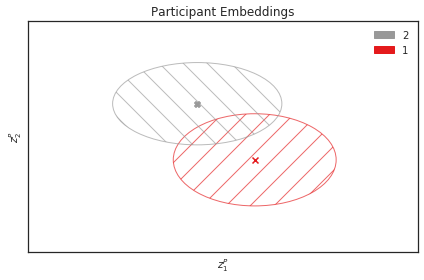

In [22]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_norest_subject_embedding' + scenario_name + '.png')

/home/zulqarnain/algorithm16_skipped/htfatorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


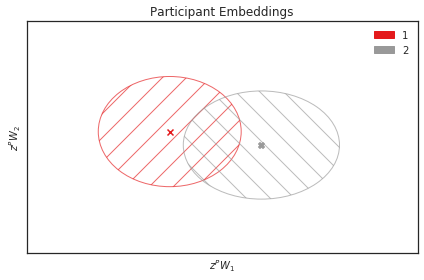

In [23]:
dtfa.scatter_subject_weight_embedding(labeler=subject_labeler, figsize=None, colormap='Set1',
                            filename='subject_norest_subject_weight_embedding' + scenario_name + '.png')

/home/zulqarnain/algorithm16_skipped/htfatorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


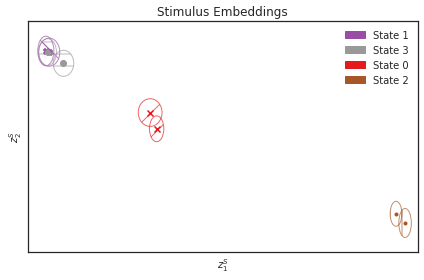

In [24]:
dtfa.scatter_task_embedding(labeler=stimulus_labeler,figsize=None, colormap='Set1',
                            filename='subject_norest_task_embedding' + scenario_name + '.png')

In [25]:
def scatter_interactions_embedding(self, labeler=None, filename='', show=True,
                                   xlims=None, ylims=None, figsize=utils.FIGSIZE,
                                   colormap='Accent', serialize_data=True,
                                   plot_ellipse=True, legend_ordering=None,nstd=3):

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]
    
    if filename == '':
        filename = self.common_name() + '_task_embedding.pdf'
    hyperparams = self.variational.hyperparams.state_vardict()
    tasks = self.tasks()
    subjects = self.subjects()
    z_p_mu = hyperparams['subject_weight']['mu'].data
    z_s_mu = hyperparams['task']['mu'].data
    interactions = OrderedSet(list(itertools.product(subjects, tasks)))
    z_ps_mu = np.zeros(shape=(len(interactions),2))
    count = 0
    for p in range (len(subjects)):
        for t in range(len(tasks)):
            joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
            interaction_embed = self.decoder.interaction_embedding(
                joint_embed).data
            z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
                                                                                 joint_embed),dim=-1)).data.numpy()
            count += 1
    embedding_name = 'z^{PS}'
    fig, ax = plt.subplots(facecolor='white', figsize=figsize, frameon=True)
    if xlims is not None:
        ax.set_xlim(xlims)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_xticks([])
    ax.set_yticks([])
    task_colors = ['black','darkgreen','red','blue']
    task_low_embeddings = []
    task_high_embeddings = []

    for i in range(len(z_ps_mu)):
        if stimulus_labeler(interactions[i][1]) == 'State 0':
            edgecolor = task_colors[0]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[0], marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[0], marker='^', s=400, linewidth=4)
            task_low_embeddings.append(z_ps_mu[i,:])
        elif stimulus_labeler(interactions[i][1]) == 'State 1':
            edgecolor = task_colors[1]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[1],marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[1],marker='^', s=400, linewidth=4)
            task_high_embeddings.append(z_ps_mu[i,:]) 
        elif stimulus_labeler(interactions[i][1]) == 'State 2':
            edgecolor = task_colors[2]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[2],marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[2],marker='^', s=400, linewidth=4)
            task_high_embeddings.append(z_ps_mu[i,:]) 
        elif stimulus_labeler(interactions[i][1]) == 'State 3':
            edgecolor = task_colors[3]
            if str(interactions[i][0]) == '1':
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[3],marker='o', s=400, linewidth=4)
            else:
                ax.scatter(z_ps_mu[i,0],z_ps_mu[i,1],facecolor='none', edgecolor=task_colors[3],marker='^', s=400, linewidth=4)
            task_high_embeddings.append(z_ps_mu[i,:]) 

    ordered_tasks = ['Baseline','Trial A', 'Trial B', 'Trial C']
    single_task_colors = ['darkgreen','red','blue']
    manual_legend = [mpatches.Patch(color=c,label=t) for (c,t) in zip(task_colors,ordered_tasks)]
    temp_dict = {key:[] for key in subjects}
    linestyle = ['solid','dashed']

    
    if filename is not None:
        fig.savefig(filename)
    if show:
        fig.show()
        
    return task_low_embeddings,task_high_embeddings


In [26]:
def interactions_labeler(subject,task):
    
    return task_labeler(task) + subject_labeler(subject)

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


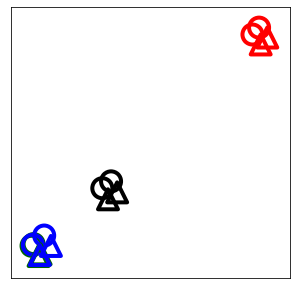

In [27]:
task_low_embeddings,task_high_embeddings= scatter_interactions_embedding(dtfa,labeler=interactions_labeler,
                               filename='subject_norest_interaction_embedding' + scenario_name + '.png',
                               plot_ellipse=True,colormap='tab20',figsize=(5,5),nstd=3)